In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/shahnawazaadil/Downloads/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv')
df

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [3]:
df.shape
df

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [4]:
df.isnull().sum()

ID      0
YEAR    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
dtype: int64

In [5]:
cols = df[['1','2','3','4','5','6','7','8','9','10','11','12']]
cols.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


/var/folders/qs/t8k57xxs507c3gjqc0gnk8q40000gn/T/ipykernel_65344/1492894556.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
/var/folders/qs/t8k57xxs507c3gjqc0gnk8q40000gn/T/ipykernel_65344/1492894556.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cols[column])
/var/folders

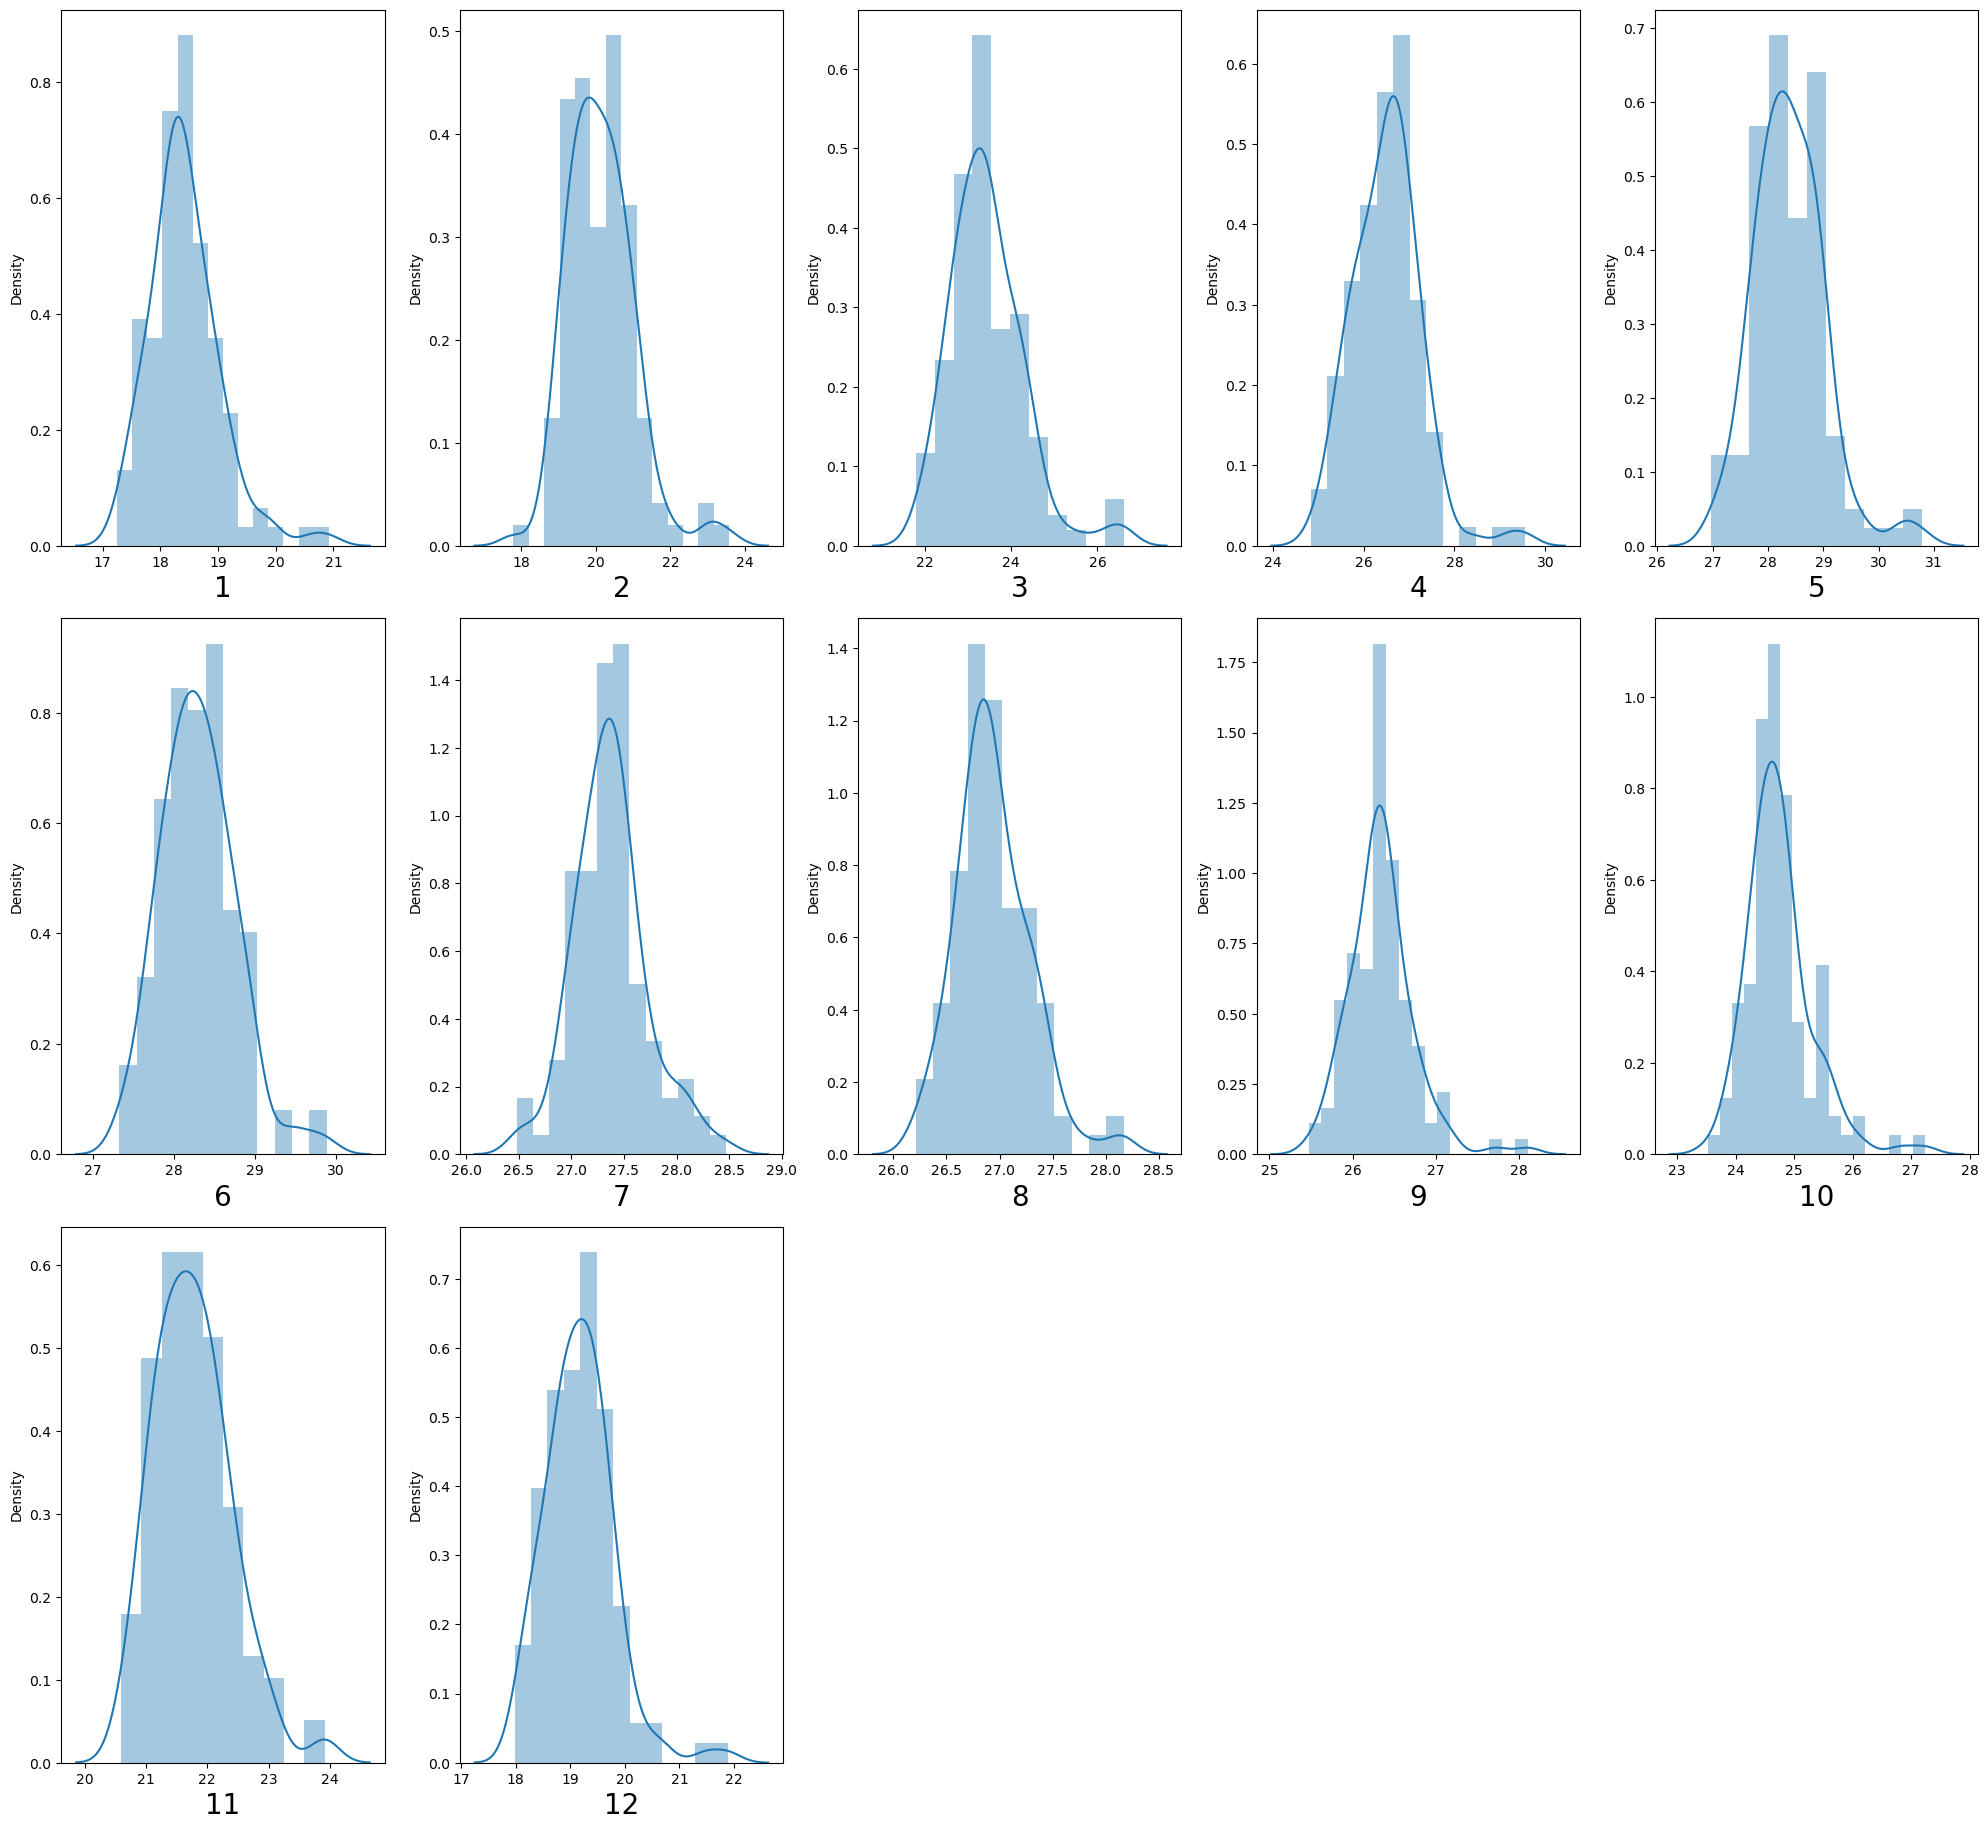

In [6]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

Outliers

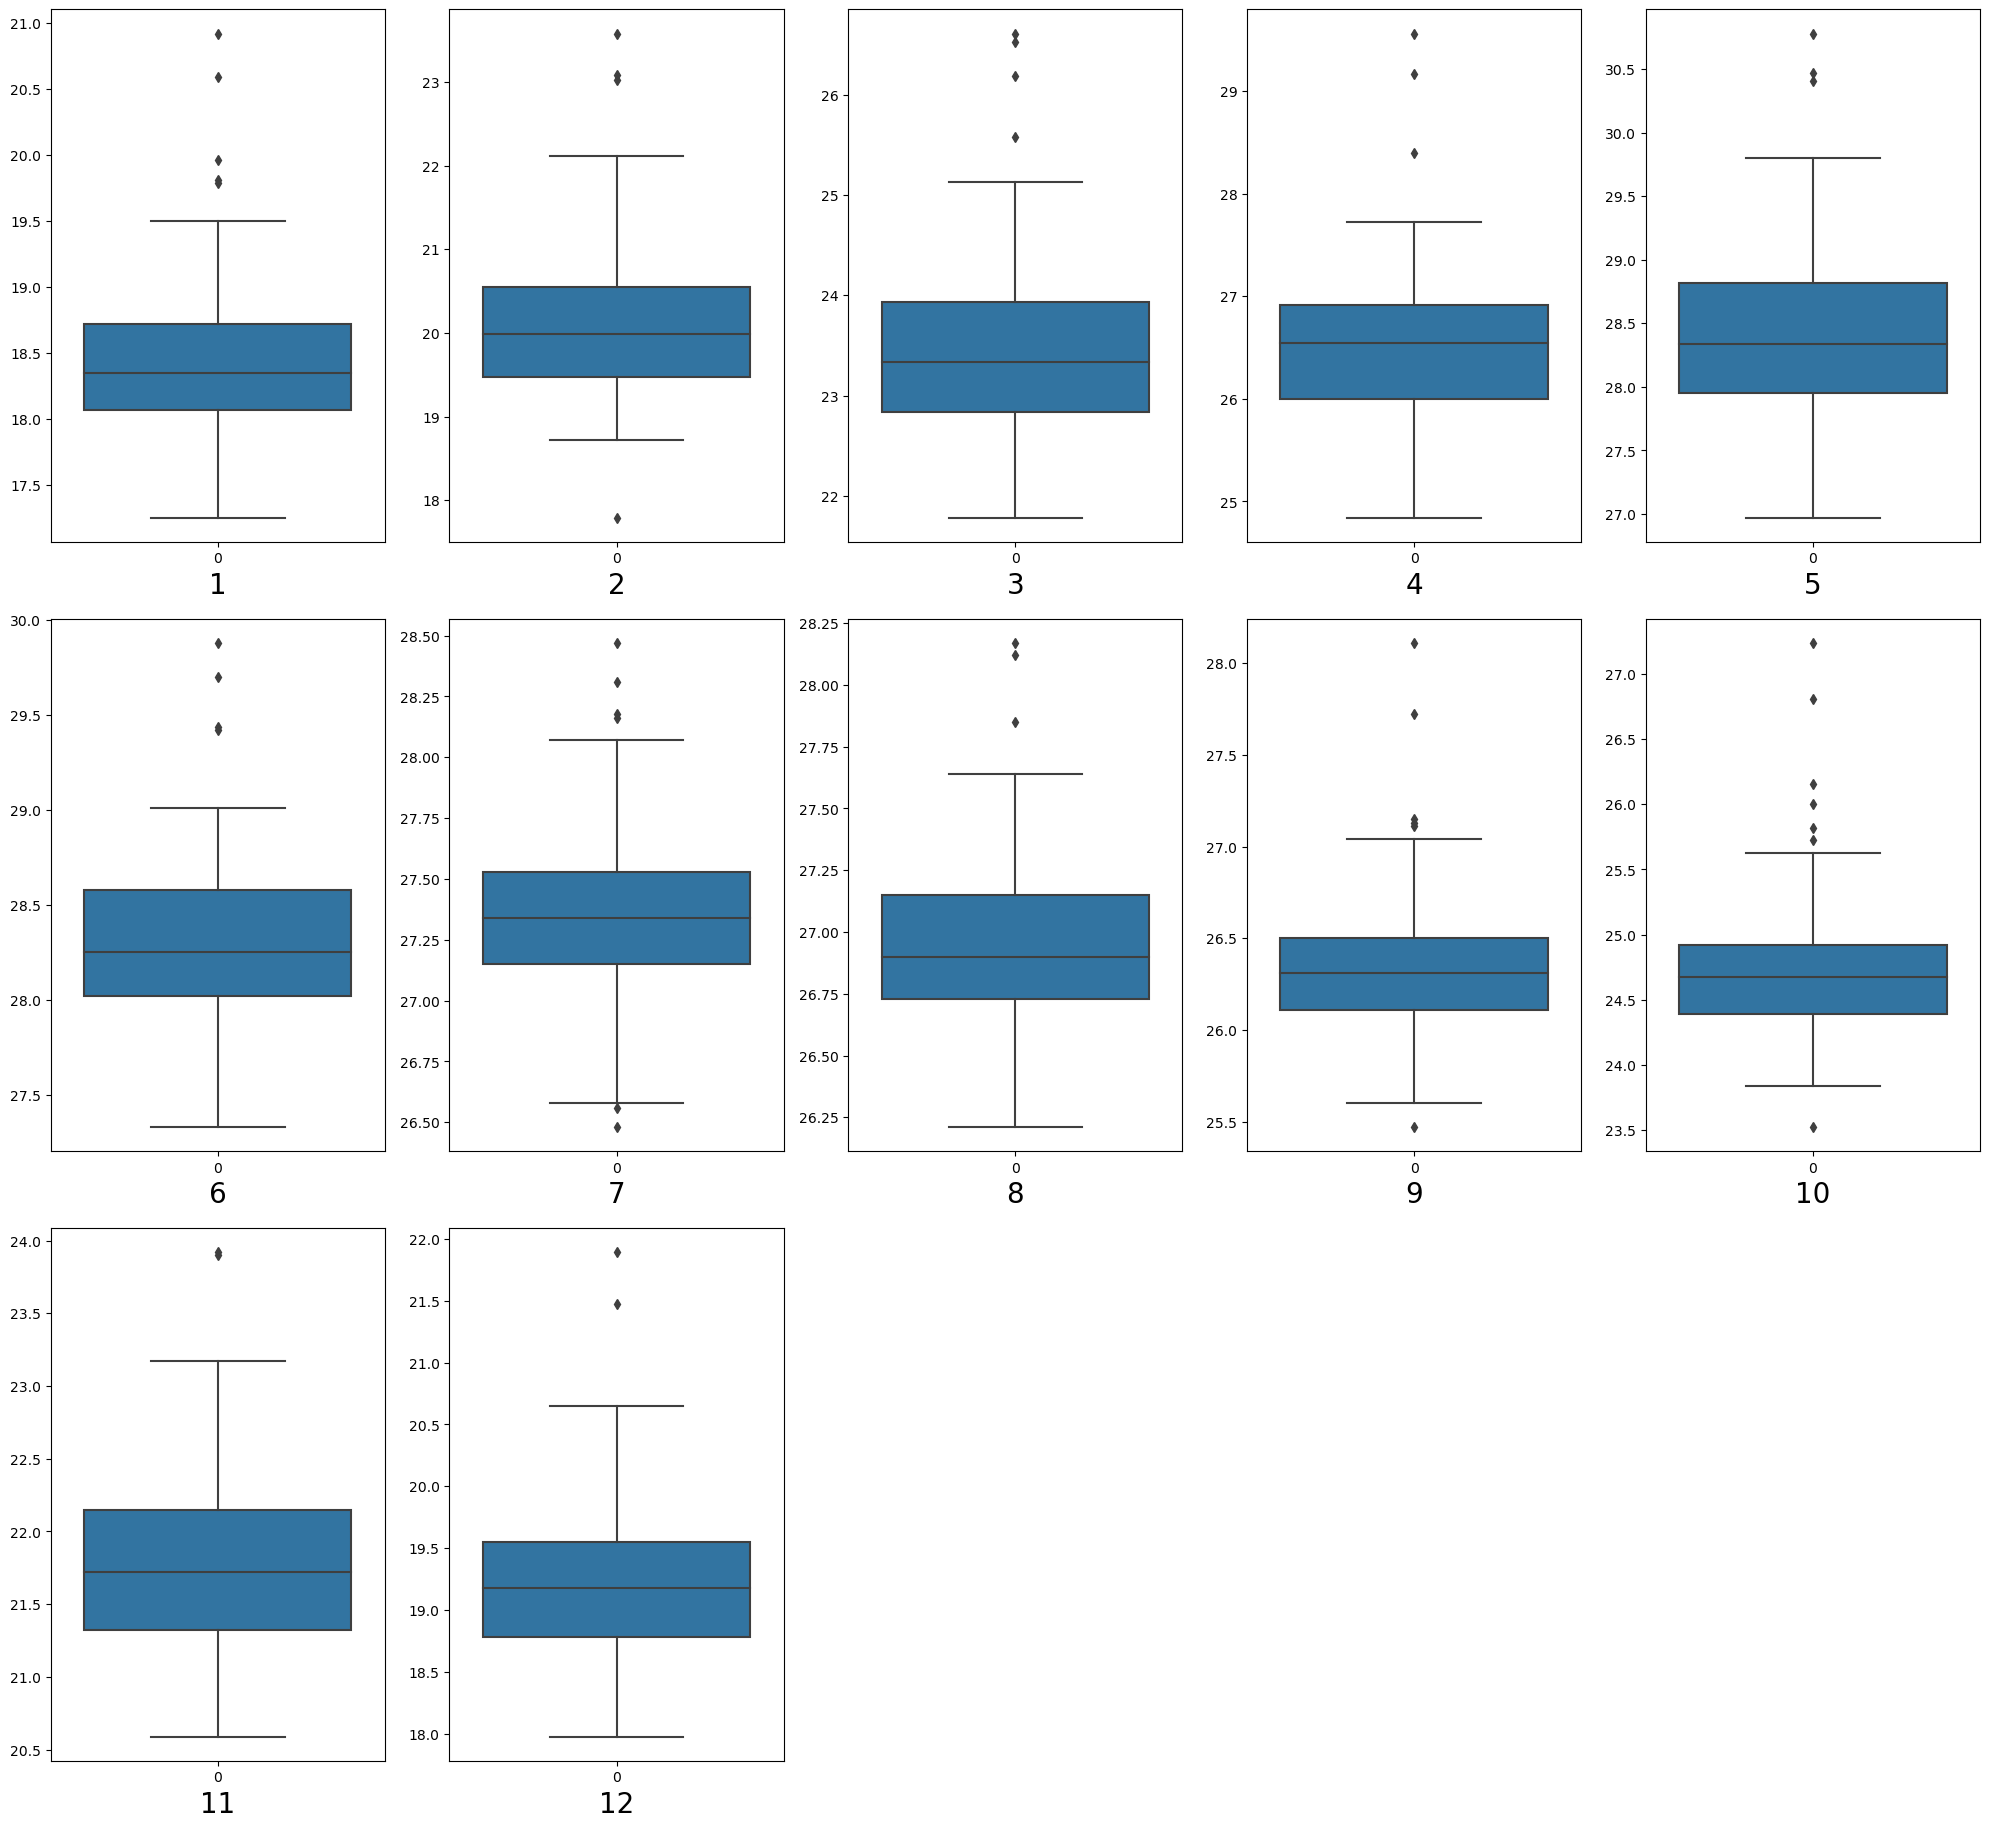

In [7]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [8]:
df_2 = df.iloc[:, 2:]

****Making prediction based on each month's preve 116 years temp value cause future temparature can be more accurately predicted from the same months of previous years temparature ****

In [9]:

df_2 = df_2.transpose()
df_2.shape
df_2

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
1,17.99,19.00,18.32,17.77,17.40,17.50,19.27,18.35,17.79,18.14,...,18.49,19.79,19.15,18.32,18.25,18.88,18.81,19.02,20.92,20.59
2,19.43,20.39,19.79,19.39,17.79,19.14,19.42,19.73,19.05,19.72,...,19.83,21.66,21.23,20.79,20.43,21.07,20.35,21.23,23.58,23.08
3,23.49,24.10,22.46,22.95,21.78,22.21,22.03,22.93,23.40,22.90,...,24.43,24.55,26.53,24.11,23.98,24.53,23.34,23.52,26.61,25.58
4,26.41,26.54,26.03,26.73,24.84,26.53,26.98,27.06,25.76,25.96,...,26.54,27.35,28.40,26.10,26.89,26.97,26.91,26.52,29.56,29.17
5,28.28,28.68,27.93,27.83,28.32,29.06,27.52,28.07,27.97,28.36,...,28.42,28.71,29.19,28.92,28.72,29.06,28.45,28.82,30.41,30.47
6,28.60,28.44,28.41,27.85,28.69,28.02,27.66,28.49,27.67,27.72,...,28.10,28.77,28.51,28.60,28.91,28.24,29.42,28.15,29.70,29.44
7,27.49,27.29,28.04,26.84,27.67,27.46,27.28,27.16,26.56,26.93,...,27.50,27.83,27.55,27.60,27.98,27.50,28.07,28.03,28.18,28.31
8,26.98,27.05,26.63,26.73,27.47,26.82,26.38,26.41,26.43,26.61,...,27.00,27.85,27.33,27.20,27.31,27.22,27.42,27.64,28.17,28.12
9,26.26,25.95,26.34,25.84,26.29,26.23,26.26,25.74,25.47,25.98,...,26.44,27.11,26.60,26.70,26.65,26.87,26.61,27.04,27.72,28.11
10,25.08,24.37,24.57,24.36,26.16,24.75,24.72,24.25,24.37,24.04,...,25.47,25.20,25.58,25.51,24.85,25.63,25.38,25.82,26.81,27.24


In [10]:
X = pd.DataFrame(df_2.iloc[:,:-1])
y = pd.DataFrame(df_2.iloc[:,-1:])

> Using Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import Lasso


ls = Lasso(alpha=0.1)
lr = LogisticRegression()
lnr= LinearRegression()
rf = RandomForestRegressor(n_estimators=75, random_state=42)
ls = Lasso(alpha=0.1)
svr = SVR(kernel='linear')
dt = DecisionTreeRegressor(random_state=0)




ls.fit(X_train,y_train)

y_pred = ls.predict(X_test)

print("ROOT MEAN SQUARED ERROR = " , np.sqrt(mean_squared_error(y_test,y_pred)))


ROOT MEAN SQUARED ERROR =  0.46067182757454395


In [13]:
predictions = ls.predict(df_2.iloc[:, 1:117])
predictions

array([20.56821438, 22.65067995, 25.20790167, 28.36791145, 30.09253204,
       29.43116462, 28.43327645, 28.13528272, 27.79226716, 26.48522058,
       23.48977611, 21.0996194 ])

In [14]:
result = pd.DataFrame({'ID': range(0, 12),'Month' : range(1,13)})
result['Prediction'] = predictions
result['Year'] = 2018


In [15]:
result

,ID,Month,Prediction,Year
0,0,1,20.568214,2018
1,1,2,22.650680,2018
2,2,3,25.207902,2018
3,3,4,28.367911,2018
4,4,5,30.092532,2018
5,5,6,29.431165,2018
6,6,7,28.433276,2018
7,7,8,28.135283,2018
8,8,9,27.792267,2018
9,9,10,26.485221,2018


In [16]:
result.to_csv('submission.csv', index=False)